In [20]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities_v3 import *
from shutil import copyfile
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import plotting_params

In [21]:
def repeat(arr, count):
    z_sig = []
    for i in range(count):
        z_sig.extend(arr)
    return z_sig

In [22]:
x_sep = 13.9#10.39
height_sep=-15.5#-15.7
stroke=-202.11
frequency=3
lambda_val=10  #20
axis="z"
offset_y=4.9
yuk_or_grav="yuk"
alpha=1
bead_size=7.6
signal_sim = force_vs_time(x_sep,height_sep,stroke,frequency,axis,lambda_val,offset_y,yuk_or_grav,alpha,bead_size)
sim_sig = repeat(signal_sim[1],10)

Loading Gravity Data... Done!
81 9.74070978211e-06
Loaded Yukawa Force


In [30]:
fft_sim = np.abs(np.fft.rfft(sim_sig))
angle_sim = np.angle(np.fft.rfft(sim_sig))

In [31]:
data_sum = np.load("data_sum_1000.npy")

In [32]:
fft_signal = np.abs(np.fft.rfft(data_sum))
angle_signal = np.angle(np.fft.rfft(data_sum))

In [33]:
data_noise = np.load("noise_sum_1000.npy")

In [34]:
fft_noise = np.abs(np.fft.rfft(data_noise))
angle_noise = np.angle(np.fft.rfft(data_noise))

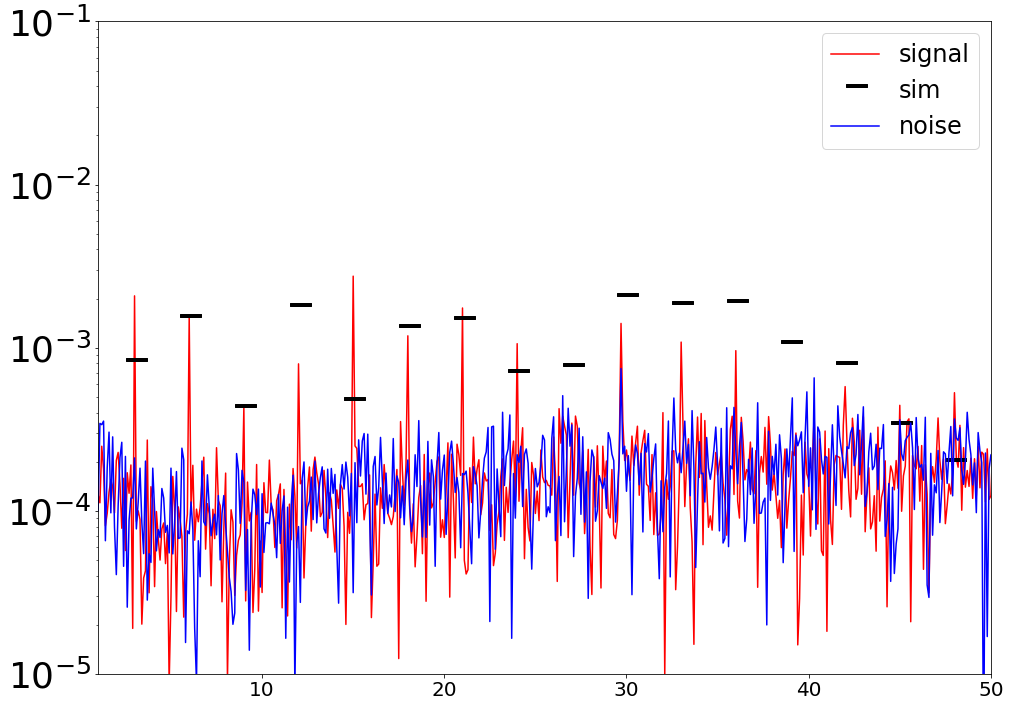

In [57]:
x=np.arange(0,2500.1,0.1)
plt.plot(x,fft_signal/np.mean(fft_signal[0:500]),linestyle="-",marker="",label="signal",color="red")
plt.plot(x,fft_sim/(8000*np.mean(fft_sim[0:500])),linestyle="",marker="$-$",markersize=24,label="sim",color="black")
plt.plot(x,fft_noise/(0.20*np.mean(fft_noise[0:500])),linestyle="-",marker="",label="noise",color="blue")

plt.yscale("log")
plt.xlim(1,50)
plt.ylim(1e-5,1e-1)
plt.legend()

(1.0, 50.0)

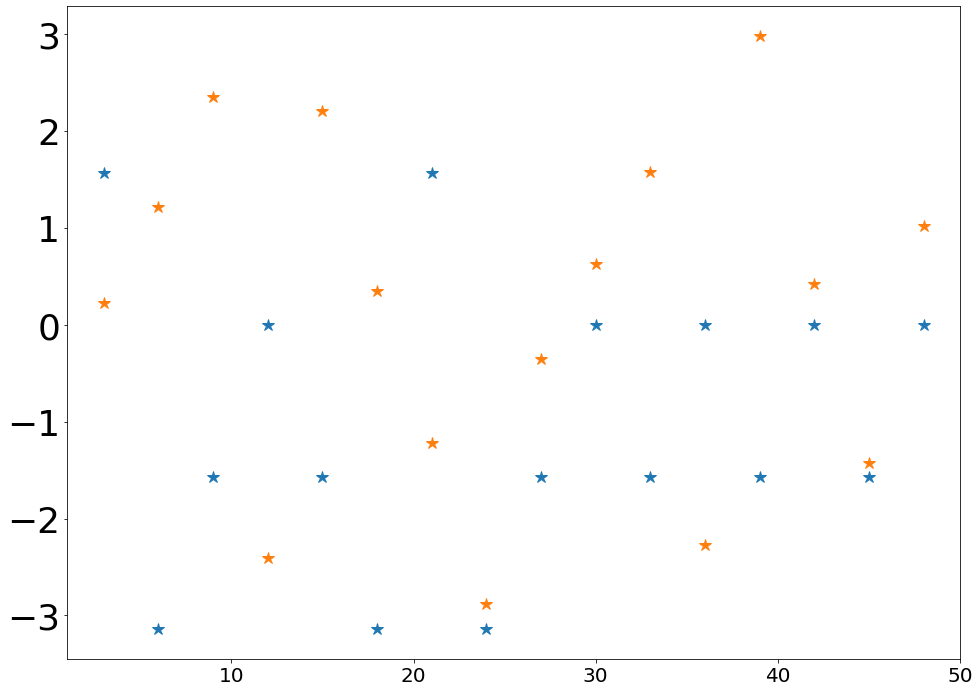

In [42]:
x=np.arange(0,2500.1,0.1)
harm=np.arange(3,51,3)
angle_sim_sub=[angle_sim[harmonic] for harmonic in np.arange(30,510,30)]
angle_sig_sub=[angle_signal[harmonic] for harmonic in np.arange(30,510,30)]

plt.plot(harm,angle_sim_sub,linestyle="",marker="*")
plt.plot(harm,angle_sig_sub,linestyle="",marker="*")

plt.xlim(1,50)

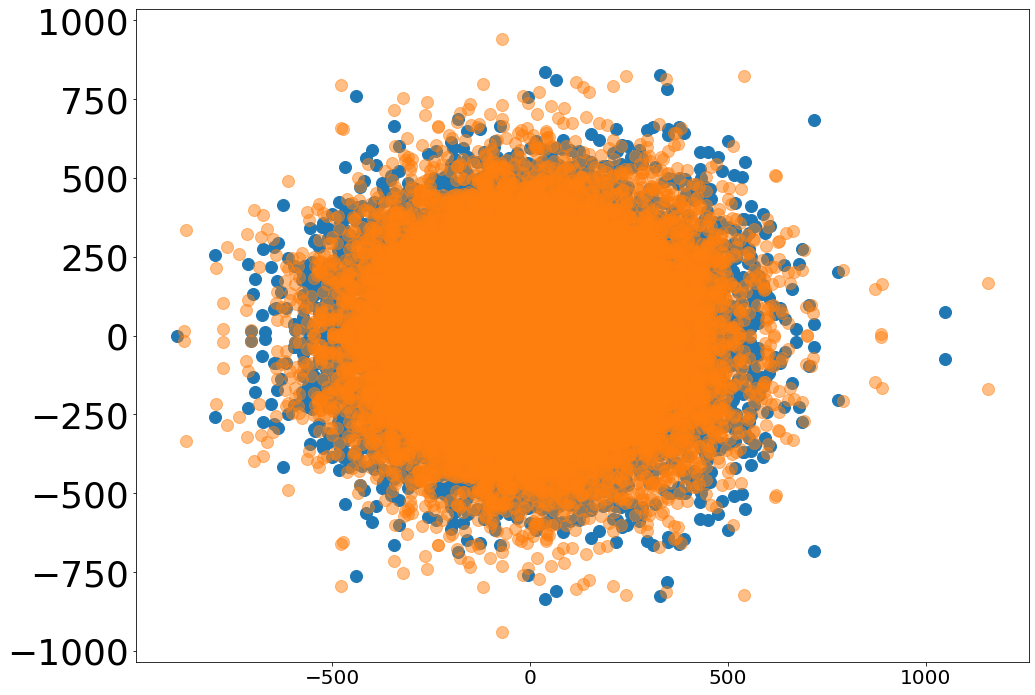

In [55]:
plt.scatter(np.real(np.fft.fft(angle_signal)),np.imag(np.fft.fft(angle_signal)))
plt.scatter(np.real(np.fft.fft(angle_sim)),np.imag(np.fft.fft(angle_sim)),alpha=0.5)
